# **ENGS 108 Fall 2022 Assignment 3**

*Due Oct 13th at 11:59PM on Github*

**Instructors:** George Cybenko

**TAs:** Ganesh Rohit Nirogi, Diksha Bubna, Sunishka Jain, Kushagra Rawat


---

## **Rules and Requirements**


1.   You are only allowed to use Python packages that are explicity imported in
the assignment notebook or are standard (bultin) python libraries like random, os, sys, etc, (Standard Bultin Python libraries will have a Python.org documentation). For this assignment you may use:
  *   [numpy](https://numpy.org/doc/stable/)
  *   [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
  *   [scikit-learn](https://scikit-learn.org/stable/)
  *   [matplotlib](https://matplotlib.org/)
  *   [tensorflow](https://www.tensorflow.org/)

2.   All code must be fit into the designated code or text blocks in the assignment notebook. They are indentified by a **TODO** qualifier.

3. For analytical questions that don't require code, type your answer cleanly in Markdown. For help, see the [Google Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb).

---


In [25]:
''' Import Statements '''
import os
import csv
import json
import pickle
import tqdm
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Loading
In this assignment we will be using the Yoga Postures Dataset from [Kaggle](https://www.kaggle.com/datasets/tr1gg3rtrash/yoga-posture-dataset) and will use the following code blocks to download the dataset directly to your Google Drive.

## Creating a Kaggle API Token
First we will need to download an API token from Kaggle in order to download the dataset, so our first step is to create a Kaggle account if you don't already have one.
1. Create a Kaggle account by following the sign up instructions [here](https://www.kaggle.com/).
2. Log into your Kaggle account and click your account icon on the upper righthand side.
3. Then select **Account** from the dropdown/sidebar menu.
4. Scroll down to the **API** section and select **Create New API Token**.
5. This will download a JSON file called kaggle.json to your Downloads folder on your computer.
6. Now run the following code block and when the **Browse** button appears, click it and select that kaggle.json file.

In [79]:
# Run this code block after creating a Kaggle API token as instructed above.
! pip install -q kaggle
from google.colab import files

# Will ask you to upload kaggle.json file and remove any old ones.
if os.path.exists('kaggle.json'):
  os.remove('kaggle.json')
files.upload()

# Will create the appropriate directory structure
if not os.path.exists('/root/.kaggle'):
  ! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


## Downloading the Dataset

7. Now we have downloaded our Kaggle credentials we can now download the Yoga Postures Dataset (or any other Kaggle dataset for that matter) directly into our Google Drive.

In [81]:
# Will ensure a train directory exists in your home and will create if it doesn't exist.
if not os.path.exists('train'):
  os.mkdir('train')
# Will download the yoga postures dataset zip file if it does not exist in the train directory.
if not os.path.exists('train/yoga-posture-dataset.zip'):
  ! kaggle datasets download -p train tr1gg3rtrash/yoga-posture-dataset
# Will check to see if the yoga postures zip file has been unzipped and will unzip the file if not.
if not os.path.exists('train/Poses.json'):
  ! unzip train/yoga-posture-dataset.zip -d train

# To remove train folder and redownload uncomment the code below
#rm -rf train

100% 446M/447M [00:21<00:00, 23.1MB/s]
100% 447M/447M [00:21<00:00, 21.8MB/s]
Archive:  train/yoga-posture-dataset.zip
  inflating: train/Adho Mukha Svanasana/File1.png  
  inflating: train/Adho Mukha Svanasana/File10.png  
  inflating: train/Adho Mukha Svanasana/File11.png  
  inflating: train/Adho Mukha Svanasana/File12.png  
  inflating: train/Adho Mukha Svanasana/File13.png  
  inflating: train/Adho Mukha Svanasana/File14.png  
  inflating: train/Adho Mukha Svanasana/File15.png  
  inflating: train/Adho Mukha Svanasana/File16.png  
  inflating: train/Adho Mukha Svanasana/File17.png  
  inflating: train/Adho Mukha Svanasana/File18.png  
  inflating: train/Adho Mukha Svanasana/File19.png  
  inflating: train/Adho Mukha Svanasana/File2.png  
  inflating: train/Adho Mukha Svanasana/File20.png  
  inflating: train/Adho Mukha Svanasana/File21.png  
  inflating: train/Adho Mukha Svanasana/File22.png  
  inflating: train/Adho Mukha Svanasana/File23.png  
  inflating: train/Adho Mukha Svana

## Viewing the Dataset Metadata
Now let's inspect the dataset metadata, i.e. the information about each of the training examples, which is located in the Poses.json file.

In [82]:
# Let's load the yoga postures metadata
import json
with open('train/Poses.json', 'r') as metafile:
  metadata = json.load(metafile)
metadata = pd.DataFrame.from_dict(metadata['Poses'])
metadata.head()

,id,sanskrit_name,english_name,img_url
0,1,Navasana,Boat,https://www.dropbox.com/s/4m64ztxkj8a4dab/boat...
1,2,Ardha Navasana,Half-Boat,https://www.dropbox.com/s/1nx0r94msxjwvyp/boat...
2,3,Dhanurasana,Bow,https://www.dropbox.com/s/wizj5kwxvez4c0a/bow....
3,4,Setu Bandha Sarvangasana,Bridge,https://www.dropbox.com/s/f1w64ybg4sn8ejt/brid...
4,5,Baddha Konasana,Butterfly,https://www.dropbox.com/s/3h2pts6xbn28dh7/butt...


## Pre-Problem: Segmenting Out the Test Data and Copying to Google Drive
A part of this homework will be a competition. Included in your assignment github repo, there is a file called **test_images.csv**. This file holds all of the image paths that you are **NOT** allowed to use during *training*. Therefore, what we are going to do in this pre-problem is remove all the testing images from your train data folder. *Hint:* You naturally are still allowed/should use the test data to evaluate your model moving foward, you're just not allowed to use these images during training.

### Task 1
Using the code available in the Data loading section as a reference, write a command using the "!" colab operator to create a new directory called **test**.

In [84]:
#TODO: Write one line of code to make a new directory called test (You might need to refresh your files view to see the change)
! mkdir test


### Task 2
Upload your **test_images.csv** file by running the following code block.

In [86]:
files.upload()

Saving test_images.csv to test_images.csv


{'test_images.csv': b'Virabhadrasana Two/File41.png\r\nVirabhadrasana Two/File15.png\r\nVirabhadrasana Two/File49.png\r\nVirabhadrasana Two/File36.png\r\nVirabhadrasana Two/File29.png\r\nVirabhadrasana Two/File34.png\r\nVirabhadrasana Two/File14.png\r\nVirabhadrasana Two/File61.jpeg\r\nVirabhadrasana Two/File25.png\r\nVirabhadrasana Two/File28.png\r\nVirabhadrasana Two/File44.png\r\nVirabhadrasana Two/File13.png\r\nUpavistha Konasana/File8.jpeg\r\nUpavistha Konasana/File3.jpeg\r\nUpavistha Konasana/File6.jpeg\r\nSetu Bandha Sarvangasana/File65.jpeg\r\nSetu Bandha Sarvangasana/File60.jpg\r\nSetu Bandha Sarvangasana/File41.png\r\nSetu Bandha Sarvangasana/File50.jpg\r\nSetu Bandha Sarvangasana/File6.png\r\nSetu Bandha Sarvangasana/File23.png\r\nSetu Bandha Sarvangasana/File13.png\r\nSetu Bandha Sarvangasana/File48.jpg\r\nSetu Bandha Sarvangasana/File12.png\r\nSetu Bandha Sarvangasana/File15.png\r\nSetu Bandha Sarvangasana/File68.jpeg\r\nSetu Bandha Sarvangasana/File17.png\r\nSetu Bandha S

### Task 3
Now let's write some code to copy over all these test images into the test folder we created as well as removing them from the train folder.

In [87]:
# First let's load the test_images.csv file
with open('test_images.csv', 'r') as f_:
  reader = csv.reader(f_)
  test_image_paths = []
  for row in reader:
    test_image_paths.append(row[0])


In [89]:
# TODO: Now using these test image paths, copy over these files to the test directory and remove them from the train directory
import os
import shutil

# test_image_paths contains the relative paths of the images in the train directory
for test_path in test_image_paths:
    # Construct the source path
    src_path = os.path.join('train', test_path)

    # Construct the destination path
    dest_path = os.path.join('test', test_path)

    # Ensure the destination directory exists
    os.makedirs(os.path.dirname(dest_path), exist_ok=True)

    # Try to move the file to the test directory
    try:
        shutil.move(src_path, dest_path)
    except FileNotFoundError:
        print(f"File not found: {src_path}. Skipping.")



### Task 4
Now that we have our test and training sets setup, let's copy them over to our Google Drive so that we don't have to run this pipeline again.

1. Mount your Google Drive in colab in the standard way by running the following code block.

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Now run the following command to copy over the training and test data to your desired location. Remember this location so you don't have to run this data loading section everytime you want to work on your homework.

In [91]:
# DESIRED GOOGLE DRIVE DIRECTORY (CHANGE ME)
DESIRED_GOOGLE_DRIVE_DIR = '/content/drive/MyDrive/data/yoga-poses'

# Makes the desired directory. If you get an error then the directory likely already exists, so comment out this line.
! mkdir -p $DESIRED_GOOGLE_DRIVE_DIR

# Command to copy over all test and train data to desired google drive path
! cp -r train $DESIRED_GOOGLE_DRIVE_DIR
! cp -r test $DESIRED_GOOGLE_DRIVE_DIR

# Problem 1: Support Vector Machine Classification
In this problem, you will be building support vector machines for some cool classification tasks.

## Task 1: Synthetic Data
 In this part we will be exploring the *circles* dataset. This dataset is avialable as a pickle file labeled *circles.pk* in your assignment repository under datasets. In this dataset you will have an $X$ array of 2 dimensional samples of the form $(x_1, x_2)$ and a $y$ array of each samples associated label.

### Part A
Upload this dataset to your Google Drive and load the dataset into memory using the pickle module (*Hint: Refer to previous assignments to figure out how to do this*). Go through the circles dataset and create a scatterplot of the circles data using the y label as each sample's color to designate their respective class.

In [93]:
# TODO: Change me
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
CIRCLES_DATASET_PATH = '/content/drive/MyDrive/data/circles/circles.pk'



Mounted at /content/drive


In [94]:
# TODO: Load the dataset using pickle load
with open(CIRCLES_DATASET_PATH, 'rb') as circles_file:
    circles = pickle.load(circles_file)



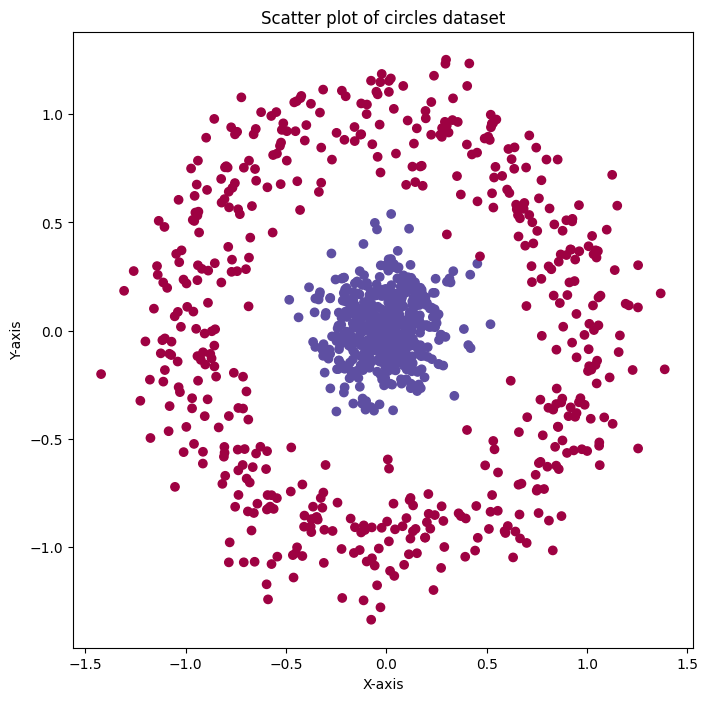

In [95]:
X, y = circles
# TODO: Graph the data
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Scatter plot of circles dataset')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### Part B
Is this dataset linearly seperable? Explain why or why not?

**TODO:** Your answer should go here.
These seems like a non linear example which cannot be separated by any straight line

### Part C
Can you think of a transformation that can be applied to this dataset that could make it linearly seperable? If so, define what these transformation function(s) might look like, and if not explain why. *Hint: Think of a higher dimensional space.*

**TODO:** Your answer should go here.
We can map this data to a higher dimensional space using SVM.
This is known as the "kernel trick." The transformation function is referred to as a kernel function. Here are some commonly used kernel functions and how they work:

Radial Basis Function (RBF) Kernel:
Function: K(x, y) = exp(-γ ||x - y||²)
Explanation: The RBF kernel, also known as the Gaussian kernel, maps the data points to an infinite-dimensional space. It assigns a higher value to data points that are closer to each other and exponentially decreases the value as they move farther apart. This creates circular decision boundaries in the higher-dimensional space, making it effective for capturing complex relationships in the data.
Polynomial Kernel:
Function: K(x, y) = (x · y + c)ᵈ
Explanation: The polynomial kernel raises the dot product of the data points to a certain power, making it suitable for capturing polynomial relationships. By increasing the degree "d," you can map the data into higher-dimensional spaces with more complex decision boundaries.
Sigmoid Kernel:
Function: K(x, y) = tanh(αx · y + c)
Explanation: The sigmoid kernel transforms the data into an infinite-dimensional space using the hyperbolic tangent function. It can be used to capture non-linear decision boundaries and is often used in neural networks as well.
Linear Kernel:
Function: K(x, y) = x · y
Explanation: The linear kernel doesn't perform any transformation; it simply represents the dot product of the data points. It's useful when the data is already linearly separable in its original feature space.This is known as the "kernel trick." The transformation function is referred to as a kernel function. Here are some commonly used kernel functions and how they work:

Radial Basis Function (RBF) Kernel:
Function: K(x, y) = exp(-γ ||x - y||²)
Explanation: The RBF kernel, also known as the Gaussian kernel, maps the data points to an infinite-dimensional space. It assigns a higher value to data points that are closer to each other and exponentially decreases the value as they move farther apart. This creates circular decision boundaries in the higher-dimensional space, making it effective for capturing complex relationships in the data.
Polynomial Kernel:
Function: K(x, y) = (x · y + c)ᵈ
Explanation: The polynomial kernel raises the dot product of the data points to a certain power, making it suitable for capturing polynomial relationships. By increasing the degree "d," you can map the data into higher-dimensional spaces with more complex decision boundaries.
Sigmoid Kernel:
Function: K(x, y) = tanh(αx · y + c)
Explanation: The sigmoid kernel transforms the data into an infinite-dimensional space using the hyperbolic tangent function. It can be used to capture non-linear decision boundaries and is often used in neural networks as well.
Linear Kernel:
Function: K(x, y) = x · y
Explanation: The linear kernel doesn't perform any transformation; it simply represents the dot product of the data points. It's useful when the data is already linearly separable in its original feature space.


### Part D
If you where able to find a transformation in (Part C), create a suitable graph showing that the dataset is linearly seperable in this new feature space.

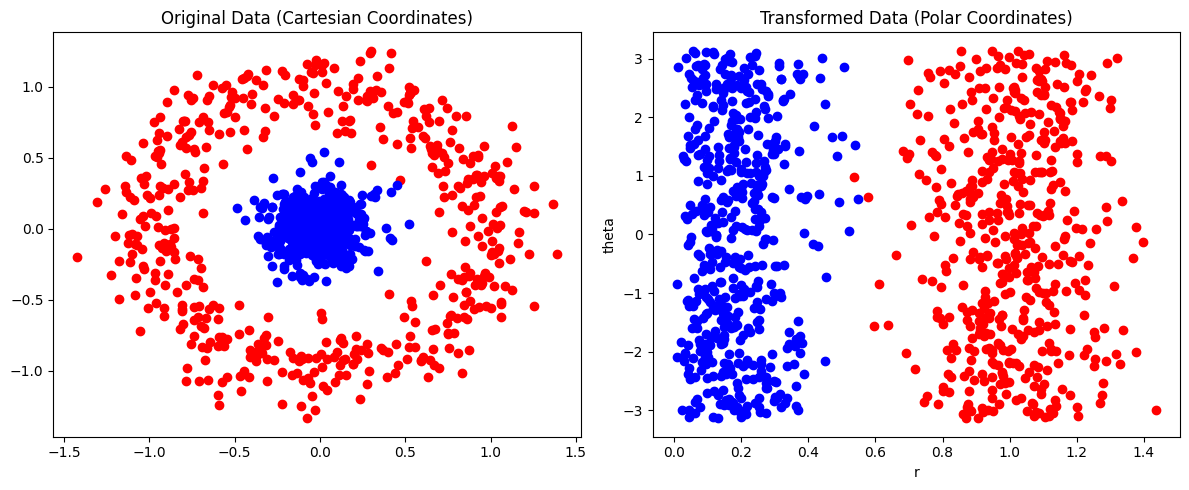

Accuracy on transformed data: 0.999


In [97]:
#TODO: Your code goes here.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Assuming circles is structured as: (coordinates, labels)
X, y = circles

# Transform data to polar coordinates
def cartesian_to_polar(X):
    r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    theta = np.arctan2(X[:, 1], X[:, 0])
    return np.column_stack([r, theta])

X_polar = cartesian_to_polar(X)

# Visualize the data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.title("Original Data (Cartesian Coordinates)")

plt.subplot(1, 2, 2)
plt.scatter(X_polar[y==0, 0], X_polar[y==0, 1], color='red')
plt.scatter(X_polar[y==1, 0], X_polar[y==1, 1], color='blue')
plt.title("Transformed Data (Polar Coordinates)")
plt.xlabel("r")
plt.ylabel("theta")

plt.tight_layout()
plt.show()

# Train a linear SVM classifier on the transformed data
clf = SVC(kernel='linear')
clf.fit(X_polar, y)

print("Accuracy on transformed data:", clf.score(X_polar, y))



## Task 2: Yoga Pose Classification
What we accomplished in Part 1 is known as the kernel trick for SVMs. Now let's focus on how we can use this idea to accomplish non-linear classification on a real world dataset. In this next part and throughout the remainder of the assignment we will be using a yoga postures dataset. These images are PNG and JPEG images with many pixels.

### Part A
You have been given a number of code skeletons throughout the course all of which load and preprocess the data for you. In this excerise tho, we will be doing the data loading manually as it is an important skill to learn. Write some code that will walk through the *Yoga Postures Dataset* directory structure and build a single large numpy array (Make sure to resize the image to something like (28, 28) or (32, 32) for the SVM and at minimum (71, 71) for the deep learning tasks) *Hint: You have been provided with a basic skeleton, study the operations of the code and finish the script.*

In [8]:
import os
import csv
import json
import pickle
import tqdm
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount=True)

from PIL import Image

PATH_TO_YOGA_TRAIN_DATA = '/content/drive/MyDrive/data/yoga-poses/train'
PATH_TO_YOGA_TEST_DATA = '/content/drive/MyDrive/data/yoga-poses/test'
RESIZE = (71,71)

# Data Lists and Pose Map
pose_map = {}
X, y = [], []

# Load Training Data
class_id = 0
for subfold in tqdm.tqdm(os.listdir(PATH_TO_YOGA_TRAIN_DATA), desc='Processing training images', leave=False):
    if os.path.isdir(os.path.join(PATH_TO_YOGA_TRAIN_DATA, subfold)):
        pose_map[class_id] = subfold
        for img_name in os.listdir(os.path.join(PATH_TO_YOGA_TRAIN_DATA, subfold)):
            img_path = os.path.join(PATH_TO_YOGA_TRAIN_DATA, subfold, img_name)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(RESIZE)
            img_array = np.array(img) / 255.0
            X.append(img_array)
            y.append(class_id)
        class_id += 1

X_train = np.array(X)
y_train = np.array(y)

# Load Testing Data
pose_map_reverse = {pose: class_id for class_id, pose in pose_map.items()}
X, y = [], []
for subfold in tqdm.tqdm(os.listdir(PATH_TO_YOGA_TEST_DATA), desc='Processing test images', leave=False):
    if os.path.isdir(os.path.join(PATH_TO_YOGA_TEST_DATA, subfold)):
        class_id = pose_map_reverse[subfold]
        for img_name in os.listdir(os.path.join(PATH_TO_YOGA_TEST_DATA, subfold)):
            img_path = os.path.join(PATH_TO_YOGA_TEST_DATA, subfold, img_name)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(RESIZE)
            img_array = np.array(img) / 255.0
            X.append(img_array)
            y.append(class_id)

X_test = np.array(X)
y_test = np.array(y)

Mounted at /content/drive


Processing test images:  51%|█████     | 24/47 [01:15<01:29,  3.88s/it]/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


### Part B
Implement a SVM classifer using sklearn and report your classification results on the testing dataset. Make sure to flatten your X data from the three channels before passing into the SVM.

In [9]:
#TODO: Build and fit your SVM classifier and print your classification report
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train_flat, y_train)
y_pred = clf.predict(X_test_flat)
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 41.21%

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.43      0.40        14
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00         3
           3       0.36      0.36      0.36        14
           4       0.24      0.45      0.31        11
           5       0.31      0.53      0.39        19
           6       0.00      0.00      0.00         2
           7       0.50      0.20      0.29        10
           8       0.00      0.00      0.00         2
           9       0.16      0.31      0.21        16
          10       0.50      0.69      0.58        16
          11       0.33      0.40      0.36        15
          12       0.76      0.72      0.74        18
          13       0.38      0.25      0.30        12
          14       1.00      0.30      0.46        10
          15       0.25      0.10      0.14        10
          16       0.41      0.41      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Problem 2: Introduction to TensorFlow
In this problem, we will start working in tensorflow to build deep learning systems starting with fully-connected (FC) and convolutional (CNN) neural networks. We will focus on using the yoga postures dataset, ending this problem with a small class competition that may come with a prize...

## Task 1: A Fully-Connected Neural Network

### Part A
Using the yoga postures dataset, build a [tensorflow Data Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) that is shuffled with a batch size of 10. *Hint: We did this in class.*

In [10]:
#TODO: Your code goes here.
import tensorflow as tf

# 1. Convert the numpy arrays to TensorFlow tensors
train_data_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
train_labels_tensor = tf.convert_to_tensor(y_train, dtype=tf.int64)

test_data_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
test_labels_tensor = tf.convert_to_tensor(y_test, dtype=tf.int64)

# 2. Create a TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_data_tensor, train_labels_tensor))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_tensor, test_labels_tensor))

# 3. Shuffle and batch the dataset
BUFFER_SIZE = len(X_train)  # This ensures that the data is fully shuffled
BATCH_SIZE = 10

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)


### Part B
Build a two layer fully connected neural network of any size with a ReLu activation function and a final softmax layer.

In [11]:
#TODO: Your code goes here. Make sure to add a Flatten layer first with the correct input shape.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Determine the number of classes based on your labels
num_classes = len(set(y_train))

# Build the model
model = Sequential([
    # Flatten layer
    Flatten(input_shape=X_train[0].shape),

    # First fully connected layer with ReLU activation
    Dense(128, activation='relu'),

    # Second fully connected layer with ReLU activation
    Dense(64, activation='relu'),

    # Softmax layer
    Dense(num_classes, activation='softmax')
])

# Print the model's summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 15123)             0         
                                                                 
 dense (Dense)               (None, 128)               1935872   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 47)                3055      
                                                                 
Total params: 1947183 (7.43 MB)
Trainable params: 1947183 (7.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Part C
Compile your model with an appropriate loss function and optimizer. Briefly describe your choices.

In [12]:
#TODO: Your code goes here.
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


### Part D
Train your model on the yoga pose training dataset. And report your accuracy on the testing dataset.

In [13]:
#TODO: Your code goes here. Hint: It's ok if the accuracy is not the best...
# Train the model on the training dataset
history = model.fit(
    X_train, y_train,
    epochs=10,          # Number of training iterations (you can adjust this)
    batch_size=32,      # Number of samples per gradient update (you can adjust this)
    validation_data=(X_test, y_test)  # Using the test data for validation in this example
)

# Evaluate the model on the testing dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test accuracy: {test_accuracy*100:.2f}%")


Epoch 1/10
70/70 [==============================] - 7s 9ms/step - loss: 4.2818 - accuracy: 0.0345 - val_loss: 3.7292 - val_accuracy: 0.0586
Epoch 2/10
70/70 [==============================] - 0s 5ms/step - loss: 3.6462 - accuracy: 0.0709 - val_loss: 3.5158 - val_accuracy: 0.1078
Epoch 3/10
70/70 [==============================] - 0s 5ms/step - loss: 3.4946 - accuracy: 0.1005 - val_loss: 3.4965 - val_accuracy: 0.1153
Epoch 4/10
70/70 [==============================] - 0s 5ms/step - loss: 3.3106 - accuracy: 0.1445 - val_loss: 3.2999 - val_accuracy: 0.1210
Epoch 5/10
70/70 [==============================] - 0s 5ms/step - loss: 3.1868 - accuracy: 0.1727 - val_loss: 3.1742 - val_accuracy: 0.1909
Epoch 6/10
70/70 [==============================] - 0s 5ms/step - loss: 3.0480 - accuracy: 0.2046 - val_loss: 3.0361 - val_accuracy: 0.2098
Epoch 7/10
70/70 [==============================] - 0s 5ms/step - loss: 2.8774 - accuracy: 0.2521 - val_loss: 3.0117 - val_accuracy: 0.2250
Epoch 8/10
70/70 [==

## Task 2: A Convolutional Neural Network
CNNs perform notoriously well on image classification tasks, so we will study a simple implementation of this network and let you guys compete to see who finds the best architecture.

### Part A: Vanilla CNN
Build, compile, and fit a CNN with the following network structure:
* A total of 3 convolutional segments consisting of:
  - A convolutional layer with "valid" padding and Relu activation and your choice of kernel size, number of filters and strides,
  - An average pooling layer,
* Then a fully connected layer with 128 neurons with ReLu activations.
* Then a fully connected layer with 64 neurons and ReLu activations.
* And ending with a softmax output layer.



In [14]:
#TODO: Build, compile and train this network on the yoga pose training data. Maybe this one will be better...
import tensorflow as tf
from tensorflow.keras import layers, models

# Building the CNN model

model = models.Sequential()

# First Convolutional Segment
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='valid', input_shape=X_train.shape[1:]))
model.add(layers.AveragePooling2D((2, 2)))

# Second Convolutional Segment
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='valid'))
model.add(layers.AveragePooling2D((2, 2)))

# Third Convolutional Segment
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='valid'))
model.add(layers.AveragePooling2D((2, 2)))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

# Output Layer
num_classes = len(np.unique(y_train))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


Epoch 1/10
70/70 [==============================] - 13s 17ms/step - loss: 3.8344 - accuracy: 0.0269 - val_loss: 3.7861 - val_accuracy: 0.0321
Epoch 2/10
70/70 [==============================] - 1s 8ms/step - loss: 3.7072 - accuracy: 0.0556 - val_loss: 3.5062 - val_accuracy: 0.1191
Epoch 3/10
70/70 [==============================] - 1s 8ms/step - loss: 3.2407 - accuracy: 0.1615 - val_loss: 3.0147 - val_accuracy: 0.1985
Epoch 4/10
70/70 [==============================] - 1s 8ms/step - loss: 2.7091 - accuracy: 0.3096 - val_loss: 2.7238 - val_accuracy: 0.3119
Epoch 5/10
70/70 [==============================] - 1s 9ms/step - loss: 2.2148 - accuracy: 0.4419 - val_loss: 2.5407 - val_accuracy: 0.3724
Epoch 6/10
70/70 [==============================] - 1s 9ms/step - loss: 1.8606 - accuracy: 0.5182 - val_loss: 2.3415 - val_accuracy: 0.4234
Epoch 7/10
70/70 [==============================] - 1s 8ms/step - loss: 1.5502 - accuracy: 0.5891 - val_loss: 2.4119 - val_accuracy: 0.4423
Epoch 8/10
70/70 [

### Part B: Transfer Learning
Now we are going to steal from a state-of-the-art [Xception](https://arxiv.org/abs/1610.02357) model. Luckily, tensorflow has this directly available to us and we are going to use transfer learning to tune this SoA model to our dataset. Therefore, run the following code block to build our base Xception model:

In [15]:
# I'll setup your base model for you.
from tensorflow.keras.applications import Xception

base_model = Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(71,71,3)
)
base_model.trainable=False

83683744/83683744 [==============================] - 0s 0us/step


Now create a new model with this *base_model* as our first layer followed by:
* Global average pooling layer,
* A Dense layer with 256 neurons and ReLu activations,
* A 40% Dropout layer,
* A softmax output layer.

Then fit this model on 30 epochs.

In [16]:
# Finish the model
model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')  # Assuming num_classes is already set from earlier
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


Epoch 1/30
70/70 [==============================] - 12s 57ms/step - loss: 3.3203 - accuracy: 0.1655 - val_loss: 2.5563 - val_accuracy: 0.3214
Epoch 2/30
70/70 [==============================] - 2s 30ms/step - loss: 2.2938 - accuracy: 0.3921 - val_loss: 2.1988 - val_accuracy: 0.4216
Epoch 3/30
70/70 [==============================] - 2s 31ms/step - loss: 1.7617 - accuracy: 0.5253 - val_loss: 1.9951 - val_accuracy: 0.4499
Epoch 4/30
70/70 [==============================] - 2s 32ms/step - loss: 1.3939 - accuracy: 0.6142 - val_loss: 1.9362 - val_accuracy: 0.4726
Epoch 5/30
70/70 [==============================] - 2s 25ms/step - loss: 1.1681 - accuracy: 0.6936 - val_loss: 1.8020 - val_accuracy: 0.5123
Epoch 6/30
70/70 [==============================] - 2s 30ms/step - loss: 0.9512 - accuracy: 0.7358 - val_loss: 1.7824 - val_accuracy: 0.5142
Epoch 7/30
70/70 [==============================] - 2s 25ms/step - loss: 0.7609 - accuracy: 0.7995 - val_loss: 1.8240 - val_accuracy: 0.5123
Epoch 8/30
7

Epoch 1/30
223/223 [==============================] - 6s 19ms/step - loss: 1.1884 - accuracy: 0.6945 - val_loss: 2.3793 - val_accuracy: 0.4291
Epoch 2/30
223/223 [==============================] - 3s 15ms/step - loss: 0.6862 - accuracy: 0.7995 - val_loss: 2.5302 - val_accuracy: 0.4858
Epoch 3/30
223/223 [==============================] - 4s 16ms/step - loss: 0.4302 - accuracy: 0.8672 - val_loss: 2.5034 - val_accuracy: 0.5180
Epoch 4/30
223/223 [==============================] - 6s 26ms/step - loss: 0.2994 - accuracy: 0.9071 - val_loss: 2.6281 - val_accuracy: 0.4934
Epoch 5/30
223/223 [==============================] - 3s 13ms/step - loss: 0.2785 - accuracy: 0.9143 - val_loss: 2.6132 - val_accuracy: 0.5009
Epoch 6/30
223/223 [==============================] - 3s 13ms/step - loss: 0.2457 - accuracy: 0.9233 - val_loss: 2.6419 - val_accuracy: 0.5123
Epoch 7/30
223/223 [==============================] - 3s 13ms/step - loss: 0.2345 - accuracy: 0.9296 - val_loss: 2.8738 - val_accuracy: 0.5274

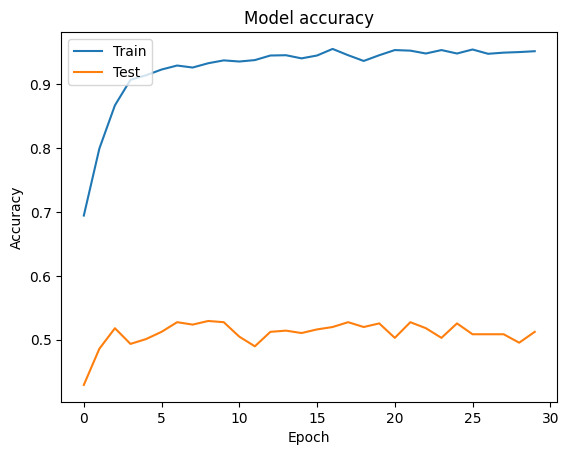

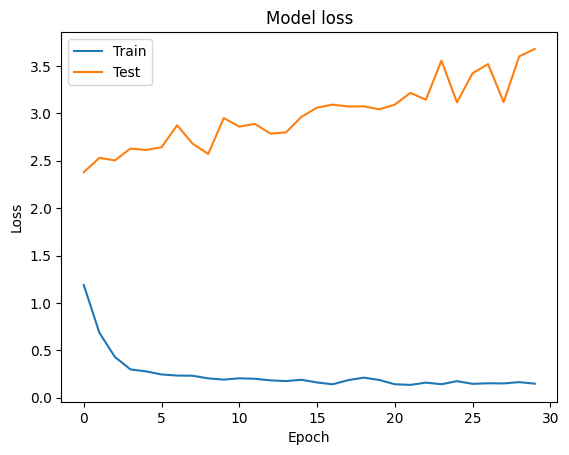

In [17]:
#TODO: Fit the model on 30 epochs
# Train the model for 30 epochs
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=test_dataset,
    verbose=1
)

# You can also plot training and validation accuracy/loss over epochs if you wish:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Part C: Build your Own Model
So know that you know the range of accuracies between poorly built models and state-of-the-art models like Xception, can you improve on them? Attempt to build your own deep neural network architecture and see if you can do better than the base CNN model presented above or better yet the Xception model we transfer learned. You may use any architecture or configuration you like.

In [18]:
#TODO: Build and train your custom model and evaluate on the test data.
model = tf.keras.models.Sequential()

# First Conv Block
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(71, 71, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second Conv Block
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Third Conv Block
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Global Average Pooling
model.add(tf.keras.layers.GlobalAveragePooling2D())

# Fully Connected Layer
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

# Output Layer
model.add(tf.keras.layers.Dense(len(pose_map), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [19]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=test_dataset,
    verbose=1
)


Epoch 1/30
223/223 [==============================] - 10s 11ms/step - loss: 3.8550 - accuracy: 0.0242 - val_loss: 3.8124 - val_accuracy: 0.0170
Epoch 2/30
223/223 [==============================] - 2s 8ms/step - loss: 3.7669 - accuracy: 0.0323 - val_loss: 3.7161 - val_accuracy: 0.0454
Epoch 3/30
223/223 [==============================] - 2s 9ms/step - loss: 3.7194 - accuracy: 0.0440 - val_loss: 3.7131 - val_accuracy: 0.0454
Epoch 4/30
223/223 [==============================] - 2s 10ms/step - loss: 3.6522 - accuracy: 0.0574 - val_loss: 3.7924 - val_accuracy: 0.0359
Epoch 5/30
223/223 [==============================] - 2s 8ms/step - loss: 3.5308 - accuracy: 0.0731 - val_loss: 4.1033 - val_accuracy: 0.0378
Epoch 6/30
223/223 [==============================] - 2s 8ms/step - loss: 3.4675 - accuracy: 0.0745 - val_loss: 3.5555 - val_accuracy: 0.0699
Epoch 7/30
223/223 [==============================] - 2s 8ms/step - loss: 3.3976 - accuracy: 0.0870 - val_loss: 3.2620 - val_accuracy: 0.1096
Epo

In [20]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_dataset)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")


53/53 [==============================] - 0s 9ms/step - loss: 1.9630 - accuracy: 0.4594
Test Loss: 1.9630
Test Accuracy: 45.94%


### Part D: Compete!
To enter the class competition for the best model save out your model as a H5 file and upload it to your assignment repo using the following code block.

In [21]:
#TODO: Save your tensorflow model with:
model.save('/content/drive/MyDrive/models/yoga-cnn.h5')
#TODO: Download your model from Google Drive and upload that saved file to your github assignment repo when you submit your assignment.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
